<a href="https://colab.research.google.com/github/DestyM/employee-performance-analysis/blob/main/employee_performance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Chargement du fichier HRDataset_v14
dt = pd.read_csv('/content/HRDataset_v14.csv')

# 1. Comprehension du Dataset

In [ ]:
# Résumé structurel des données
dt_cp = dt.copy()
dt_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [ ]:
# Résumé statistique rapide des colonnes numériques
dt_cp.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [ ]:
# Variables catégorielles
# Nominale : Sex, RaceDesc, Department, MaritalDesc, State, Position, CitizenDesc, HispanicLatino, TermReason, EmploymentStatus, RecruitmentSource
# Ordinale : PerformanceScore

# DOB, DateofHire, DateofTermination,ManagerName, LastPerformanceReview_Date
categorical = ['Position', 'State', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'PerformanceScore', 'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department', 'ManagerName', 'RecruitmentSource', 'LastPerformanceReview_Date', 'PerfScoreID', 'ManagerID']
categorical_data = dt_cp[categorical]
categorical_data.head()

,Position,State,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,PerformanceScore,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,LastPerformanceReview_Date,PerfScoreID,ManagerID
0,Production Technician I,MA,07/10/83,M,Single,US Citizen,No,Exceeds,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,LinkedIn,1/17/2019,4,22.0
1,Sr. DBA,MA,05/05/75,M,Married,US Citizen,No,Fully Meets,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,Indeed,2/24/2016,3,4.0
2,Production Technician II,MA,09/19/88,F,Married,US Citizen,No,Fully Meets,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,LinkedIn,5/15/2012,3,20.0
3,Production Technician I,MA,09/27/88,F,Married,US Citizen,No,Fully Meets,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,Indeed,1/3/2019,3,16.0
4,Production Technician I,MA,09/08/89,F,Divorced,US Citizen,No,Fully Meets,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,Google Search,2/1/2016,3,39.0


In [ ]:
# Variables numériques :
# EmpID, MarriedID, MaritalStatusID, GenderID, EmpStatusID, EngagementSurvey,
# EmpSatisfaction, Salary, DaysLateLast30, Absences, SpecialProjectsCount
numerical = ['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'EngagementSurvey', 'EmpSatisfaction', 'Salary', 'DaysLateLast30', 'Absences', 'SpecialProjectsCount']
numerical_data = dt_cp[numerical]
numerical_data.head()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,EngagementSurvey,EmpSatisfaction,Salary,DaysLateLast30,Absences,SpecialProjectsCount
0,10026,0,0,1,1,4.60,5,62506,0,1,0
1,10084,1,1,1,5,4.96,3,104437,0,17,6
2,10196,1,1,0,5,3.02,3,64955,0,3,0
3,10088,1,1,0,1,4.84,5,64991,0,15,0
4,10069,0,2,0,5,5.00,4,50825,0,2,0


In [ ]:
# Variables temporelles : DateofHire, DOB, DateofTermination
temporal = ['DateofHire', 'DOB', 'DateofTermination']
temporal_data = dt_cp[temporal]
temporal_data.head()

,DateofHire,DOB,DateofTermination
0,7/5/2011,07/10/83,NaN
1,3/30/2015,05/05/75,6/16/2016
2,7/5/2011,09/19/88,9/24/2012
3,1/7/2008,09/27/88,NaN
4,7/11/2011,09/08/89,9/6/2016


In [ ]:
# Affichage des valeurs manquantes des colonnes [DateofTermination, ManagerID]
missing_data = dt_cp.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

In [ ]:
# Gestion des valeurs manquantes
dt_cp['DateofTermination'] = pd.to_datetime(dt_cp['DateofTermination'])

# Remplacement des NaN par une date de référence (ex : aujourd’hui)
dt_cp['DateofTermination_filled'] = dt_cp['DateofTermination'].fillna(pd.Timestamp.today())

# Le ManagerID le plus courant
most_manager = dt_cp['ManagerID'].mode()[0]

# Remplacer les NaN
dt_cp['ManagerID_filled'] = dt_cp['ManagerID'].fillna(most_manager)

In [ ]:
dt_cp

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,DateofTermination_filled,ManagerID_filled
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1,2025-05-07 08:57:33.197836,22.0
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17,2016-06-16 00:00:00.000000,4.0
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3,2012-09-24 00:00:00.000000,20.0
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15,2025-05-07 08:57:33.197836,16.0
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2,2016-09-06 00:00:00.000000,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13,2025-05-07 08:57:33.197836,20.0
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Google Search,PIP,3.20,2,0,9/2/2015,5,4,2015-09-29 00:00:00.000000,12.0
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16,2025-05-07 08:57:33.197836,2.0
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11,2025-05-07 08:57:33.197836,4.0


# 2. Nettoyage et préparation

In [ ]:
# Conversion des dates
dt_cp['DateofHire'] = pd.to_datetime(dt_cp['DateofHire'])

# Création d'une colonne booléenne "StillEmployed"
dt_cp['StillEmployed'] = dt_cp['DateofTermination'].isna()

# Calcul de la durée d’emploi
dt_cp['EmploymentLength'] = (dt_cp['DateofTermination_filled'] - dt_cp['DateofHire']).dt.days / 365

# Création des variables dérivées
dt_cp.rename(columns={'DateofHire': 'Oldtimer'}, inplace=True)
dt_cp.rename(columns={'DOB': 'Age'}, inplace=True)

In [ ]:
dt_cp

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,DateofTermination_filled,ManagerID_filled,StillEmployed,EmploymentLength
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,4.60,5,0,1/17/2019,0,1,2025-05-07 08:57:33.197836,22.0,True,13.849315
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,4.96,3,6,2/24/2016,0,17,2016-06-16 00:00:00.000000,4.0,False,1.216438
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,3.02,3,0,5/15/2012,0,3,2012-09-24 00:00:00.000000,20.0,False,1.224658
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,4.84,5,0,1/3/2019,0,15,2025-05-07 08:57:33.197836,16.0,True,17.342466
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,5.00,4,0,2/1/2016,0,2,2016-09-06 00:00:00.000000,39.0,False,5.161644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,4.07,4,0,2/28/2019,0,13,2025-05-07 08:57:33.197836,20.0,True,10.841096
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,3.20,2,0,9/2/2015,5,4,2015-09-29 00:00:00.000000,12.0,False,7.076712
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,4.60,5,6,2/21/2019,0,16,2025-05-07 08:57:33.197836,2.0,True,15.084932
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,5.00,3,5,2/1/2019,0,11,2025-05-07 08:57:33.197836,4.0,True,10.112329


In [ ]:
# Encoder les variables catégorielles si besoin (Label Encoding / One-Hot)
dt_onehot = pd.get_dummies(dt_cp, columns=['Sex', 'RaceDesc', 'Department', 'MaritalDesc', 'State', 'Position', 'CitizenDesc', 'HispanicLatino', 'TermReason', 'EmploymentStatus', 'RecruitmentSource'], drop_first=True)

le = LabelEncoder()
dt_cp['PerformanceScore_encoded'] = le.fit_transform(dt_cp['PerformanceScore'])

In [ ]:
dt_onehot

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,EmploymentStatus_Terminated for Cause,EmploymentStatus_Voluntarily Terminated,RecruitmentSource_Diversity Job Fair,RecruitmentSource_Employee Referral,RecruitmentSource_Google Search,RecruitmentSource_Indeed,RecruitmentSource_LinkedIn,RecruitmentSource_On-line Web application,RecruitmentSource_Other,RecruitmentSource_Website
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,False,False,False,False,False,False,True,False,False,False
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,False,True,False,False,False,True,False,False,False,False
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,False,True,False,False,False,False,True,False,False,False
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,False,False,False,False,False,True,False,False,False,False
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,False,False,False,False,False,False,True,False,False,False
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,False,True,False,False,True,False,False,False,False,False
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,False,False,False,True,False,False,False,False,False,False
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,False,False,False,True,False,False,False,False,False,False


# 3. Analyse Exploratoire (EDA)

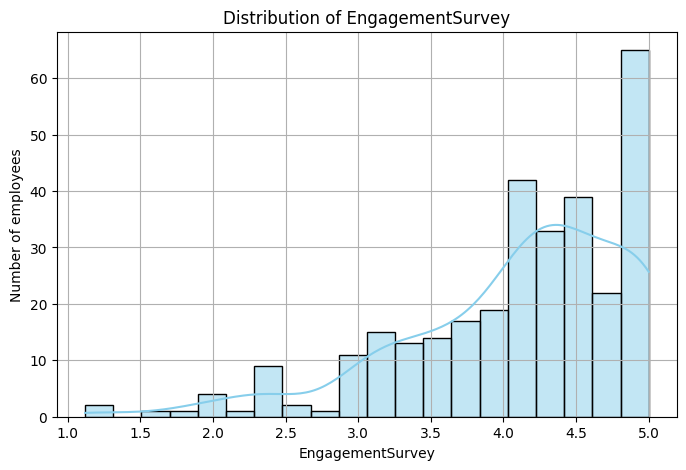

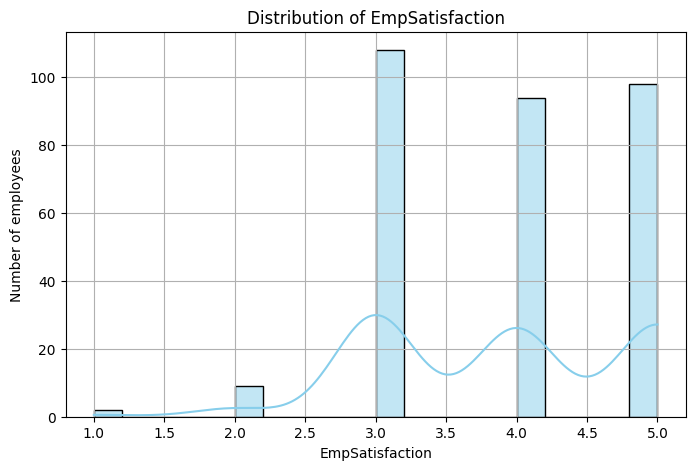

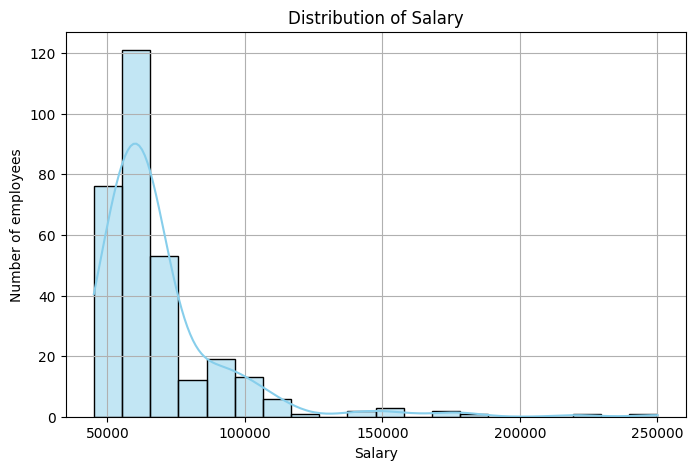

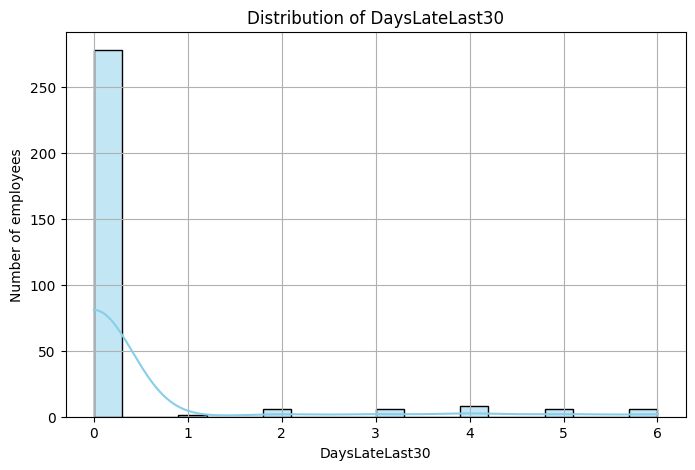

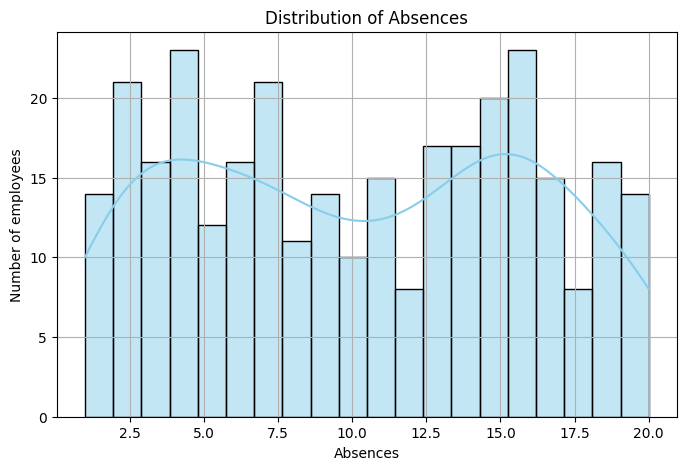

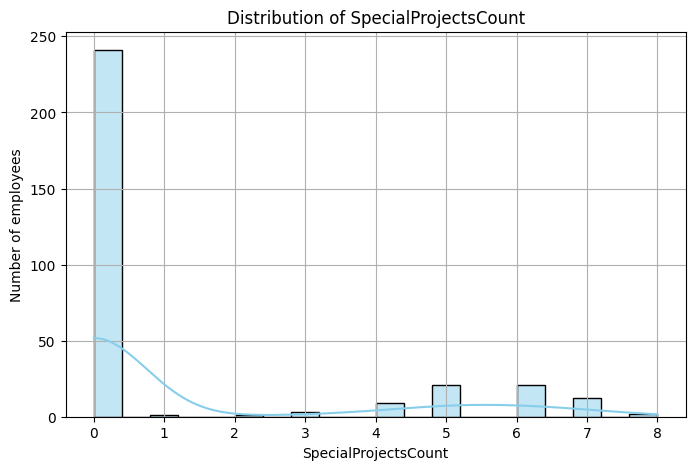

In [ ]:
# Visualisation univariée (Histogramme et Barplots)

# Variables numériques et catégorielles
numeric_feature = ['EngagementSurvey', 'EmpSatisfaction', 'Salary', 'DaysLateLast30', 'Absences', 'SpecialProjectsCount']
categorical_feature = ['Sex', 'MaritalDesc', 'CitizenDesc', 'PerformanceScore', 'RaceDesc', 'EmploymentStatus', 'Department']

# Histogramme pour les variables numériques
for col in numeric_feature:
  plt.figure(figsize=(8, 5))
  sns.histplot(dt_cp[col].dropna(), kde=True, color='skyblue', bins=20)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Number of employees')
  plt.grid(True)
  plt.show()


**Analyse univariée**
- La **distribution du salaire** est centrée autour de 58 000 €, mais il y a une forte variabilité (écart-type ≈ 10 000);
- Quant à **l'engagement et la satisfaction** c'est majoritairement entre 3 et 6 (échelle sur 5 ou 6), mais il y a la présence de notes très faibles ;
- Pour la **performance score** c'est la majorité des employés sont en Fully Meets Expectations (répond pleinement aux attentes), très peu en Needs Improvement (besoin d'amélioration)

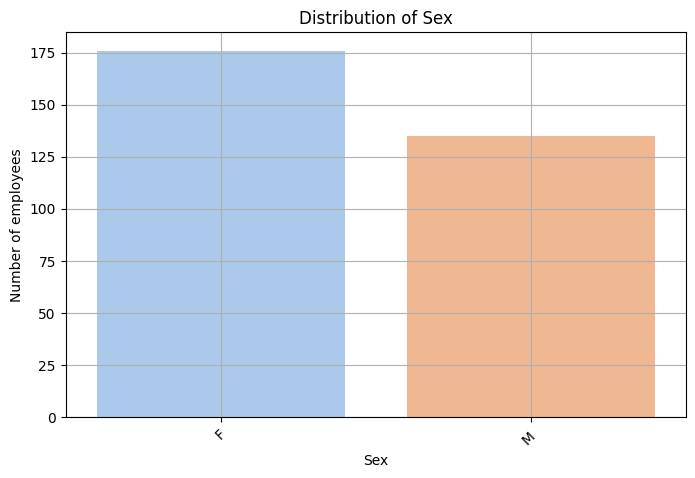

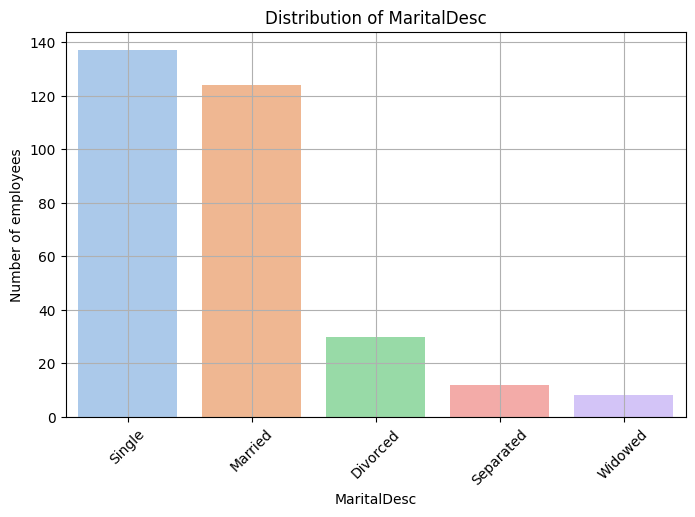

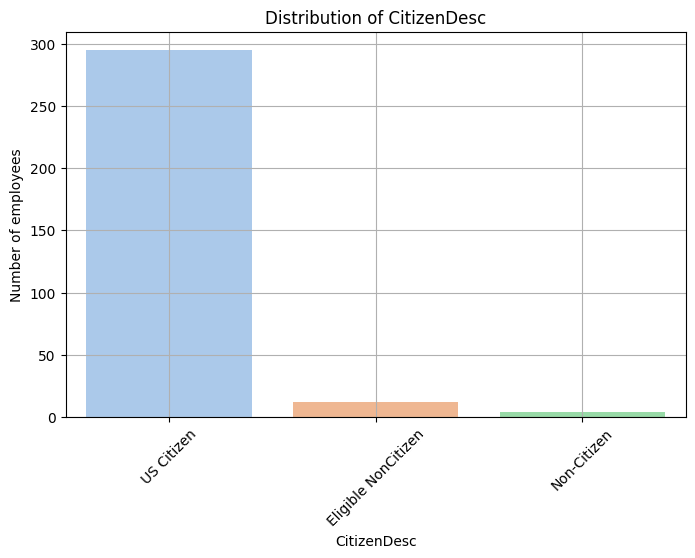

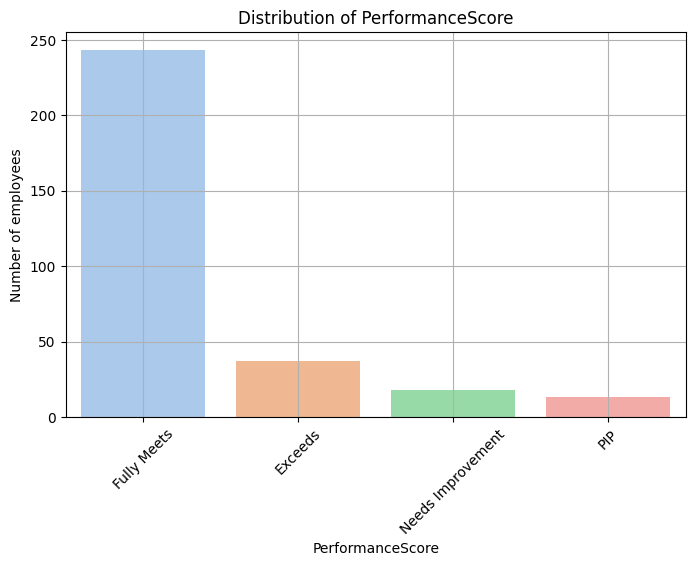

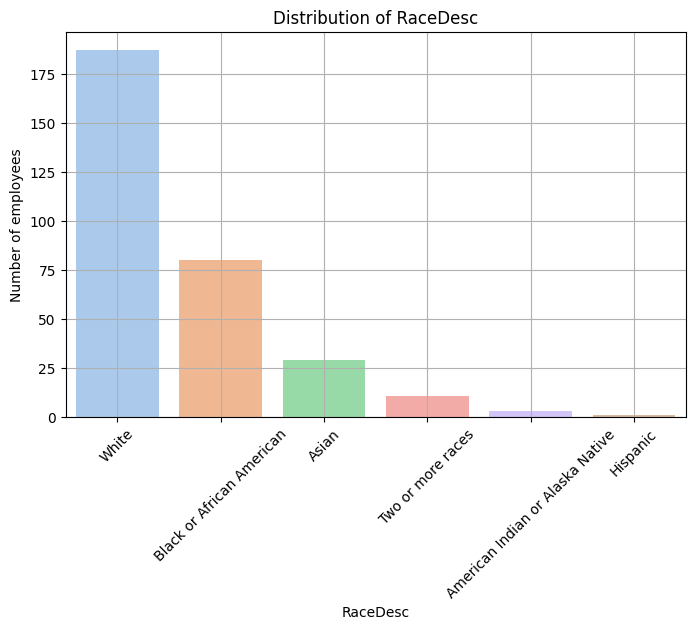

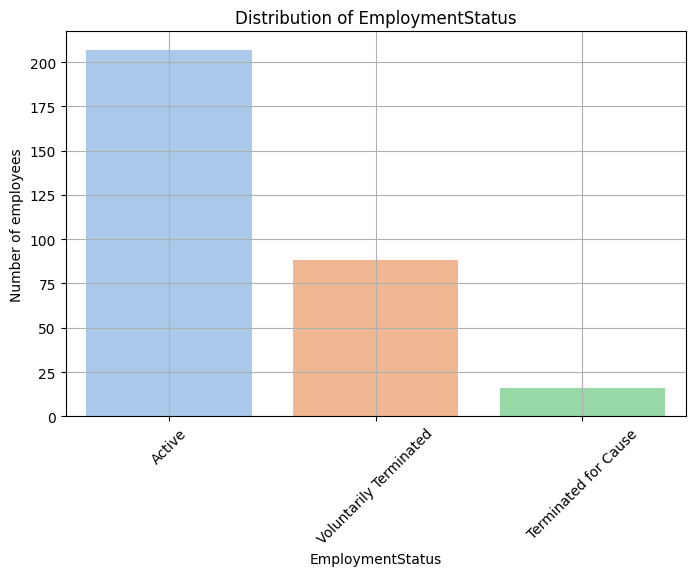

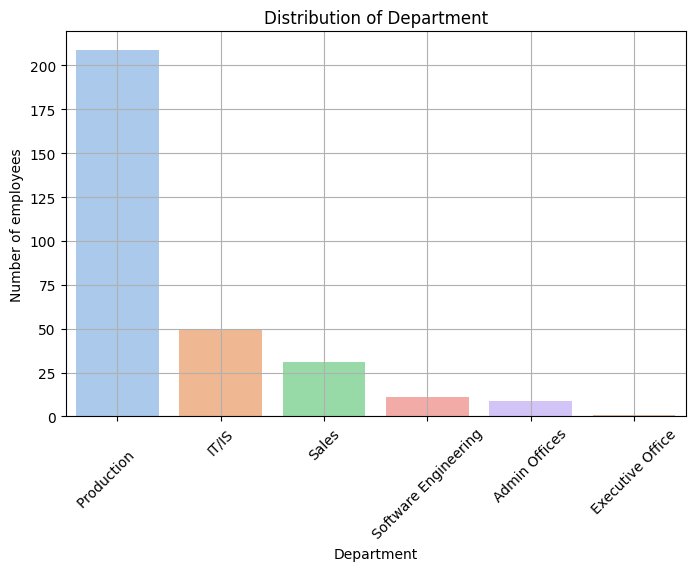

In [ ]:
# Barplots pour les variables catégorielles
for col in categorical_feature:
  plt.figure(figsize=(8, 5))
  sns.countplot(data=dt_cp, x=col, order=dt_cp[col].value_counts().index, palette='pastel')
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Number of employees')
  plt.xticks(rotation=45)
  plt.grid(True)
  plt.show()

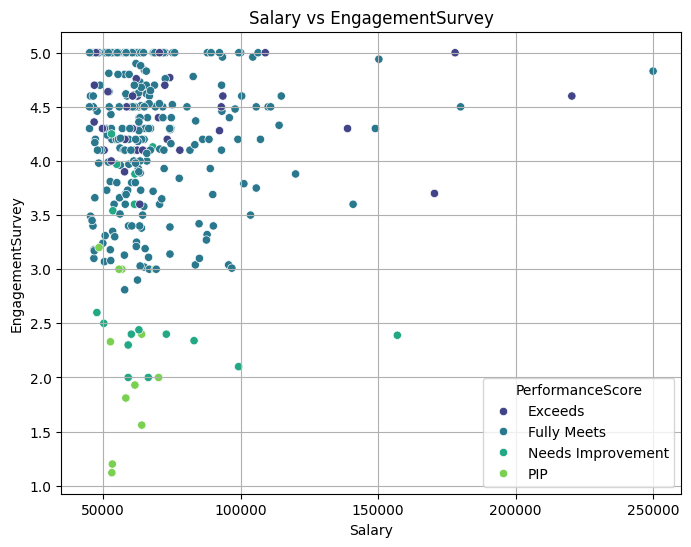

In [ ]:
# Visualisation bivariée (Scatter plots et Boxplots)

# Scatter plots (entre deux variables numériques)
plt.figure(figsize=(8,6))
sns.scatterplot(data=dt_cp, x='Salary', y='EngagementSurvey', hue='PerformanceScore', palette='viridis')
plt.title('Salary vs EngagementSurvey')
plt.xlabel('Salary')
plt.ylabel('EngagementSurvey')
plt.legend(title='PerformanceScore')
plt.grid(True)
plt.show()

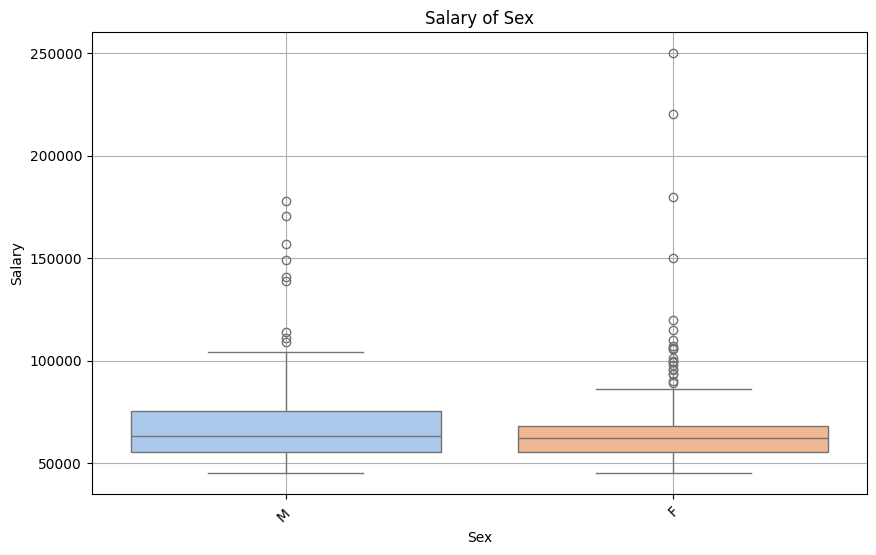

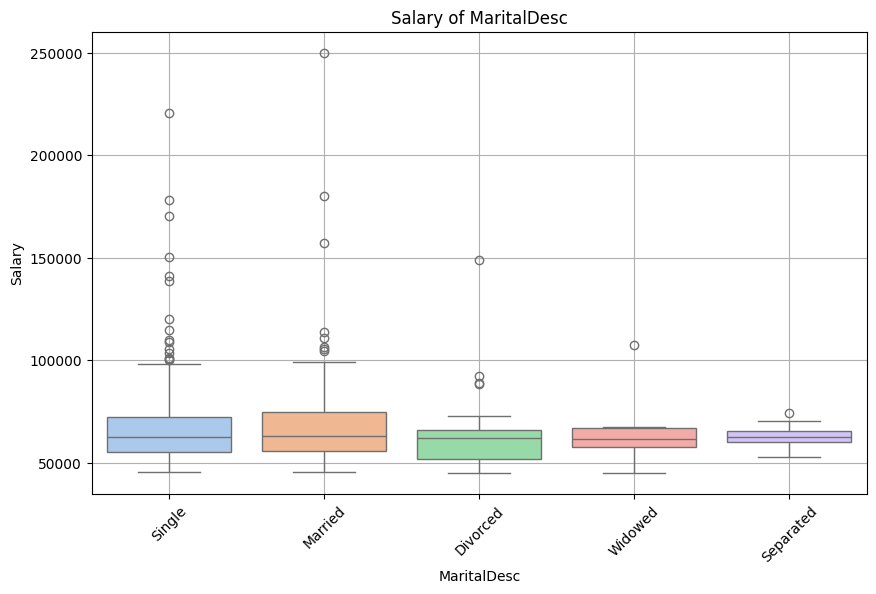

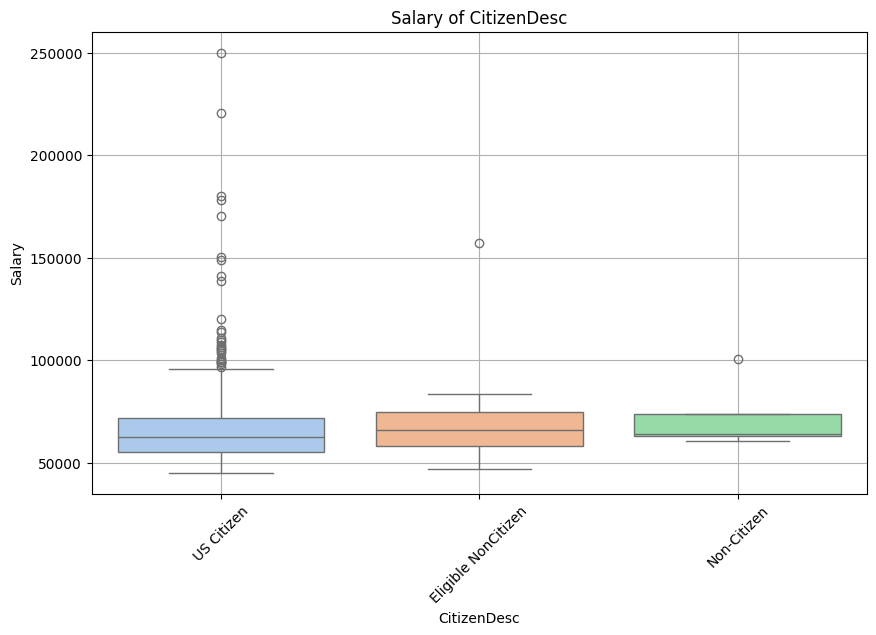

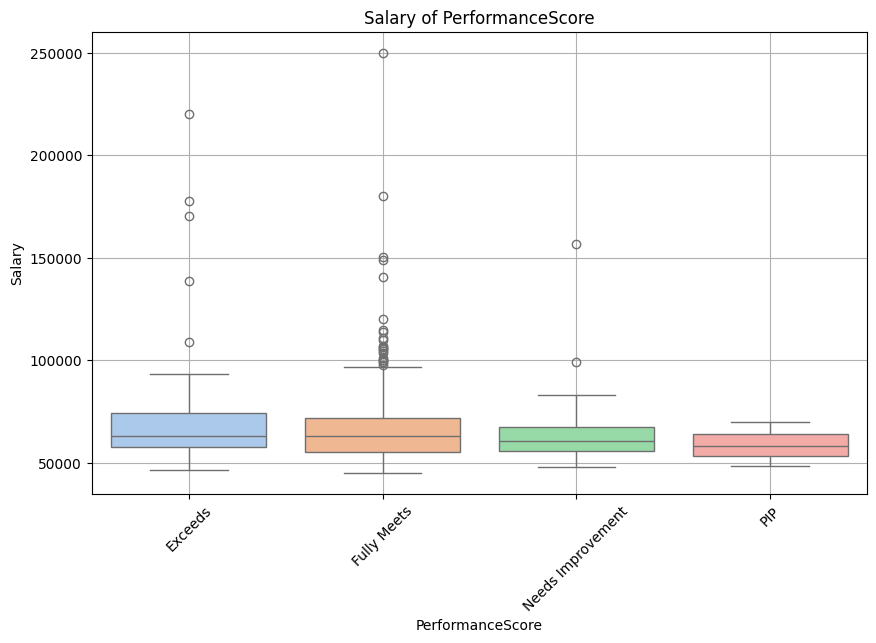

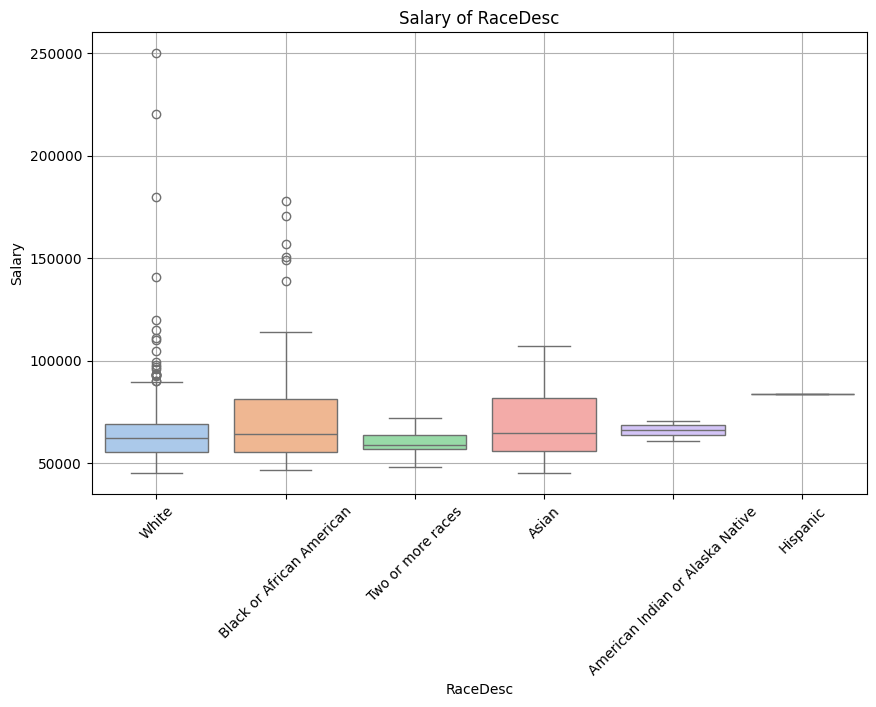

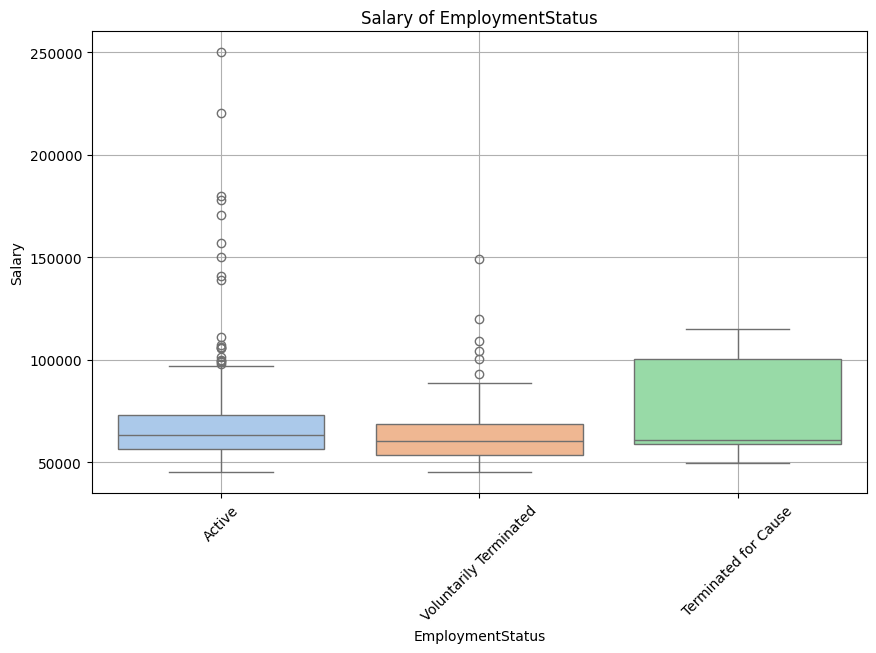

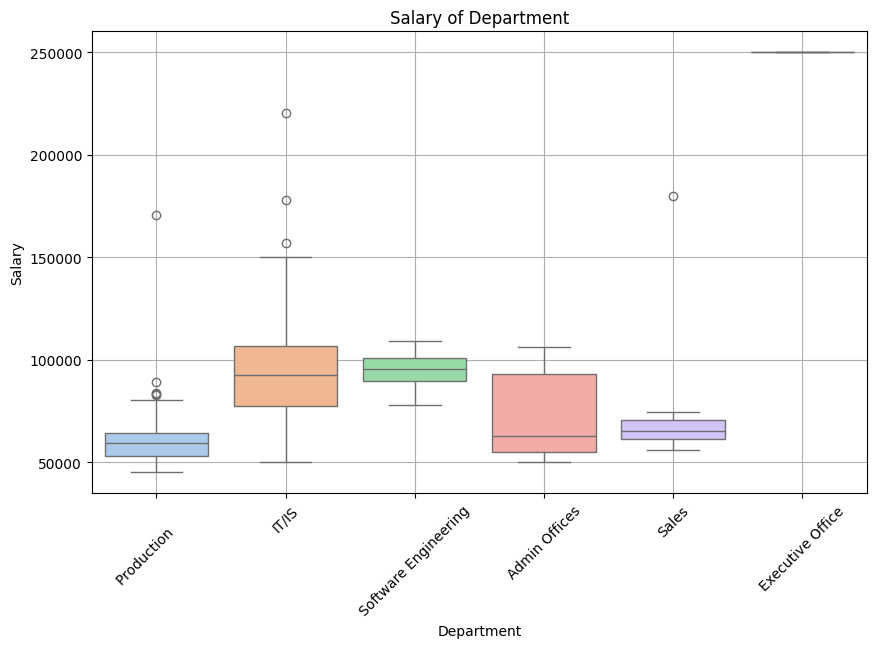

In [ ]:
# Boxplots (variable numérique selon catégorie)
for cat_col in categorical_feature:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=dt_cp, x=cat_col, y='Salary', palette='pastel')
    plt.title(f'Salary of {cat_col}')
    plt.xlabel(cat_col)
    plt.ylabel('Salary')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

Analyse bivariée
- Les employés ayant plus de **projets spéciaux** ont souvent un meilleur score de performance ;

- Une moyenne plus élevée de projets est observée chez les Exceeds Expectations ;

- Tendance positive : plus un employé participe à des projets, plus son engagement augmente ;

- Les employés ayant plus d'absences tendent à avoir un score de performance inférieur ;

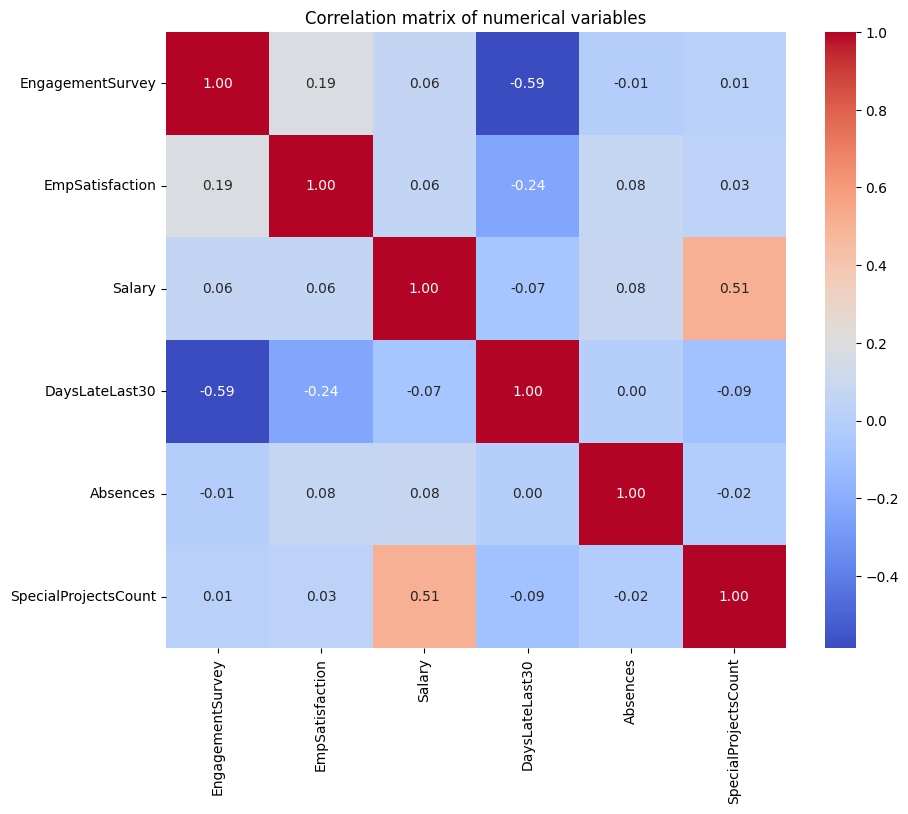

In [ ]:
# Matrice de corrélation (entre toutes les variables numériques)
corr_matrix = dt_cp[numeric_feature].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix of numerical variables')
plt.show()

In [ ]:
# Valeurs extrêmes / Outliers : 1.00

In [ ]:
# Deux variables catégorielles pour exemple
cat_var1 = 'Department'
cat_var2 = 'PerformanceScore'

# Crosstab : Tableau de contingence
crosstab = pd.crosstab(dt_cp[cat_var1], dt_cp[cat_var2])

print("Crosstab entre Department et PerformanceScore :\n")
print(crosstab)

Crosstab entre Department et PerformanceScore :

PerformanceScore      Exceeds  Fully Meets  Needs Improvement  PIP
Department                                                        
Admin Offices               0            9                  0    0
Executive Office            0            1                  0    0
IT/IS                       6           42                  1    1
Production                 27          159                 15    8
Sales                       2           24                  1    4
Software Engineering        2            8                  1    0


Analyse des relations catégorielles

- Certains départements (ex: Production) comptent plus de Needs Improvement ;

- D'autres comme IT ou Executive affichent de meilleurs scores moyens ;

- Des tendances managériales apparaissent : certains managers ont des équipes avec un meilleur score de performance ;

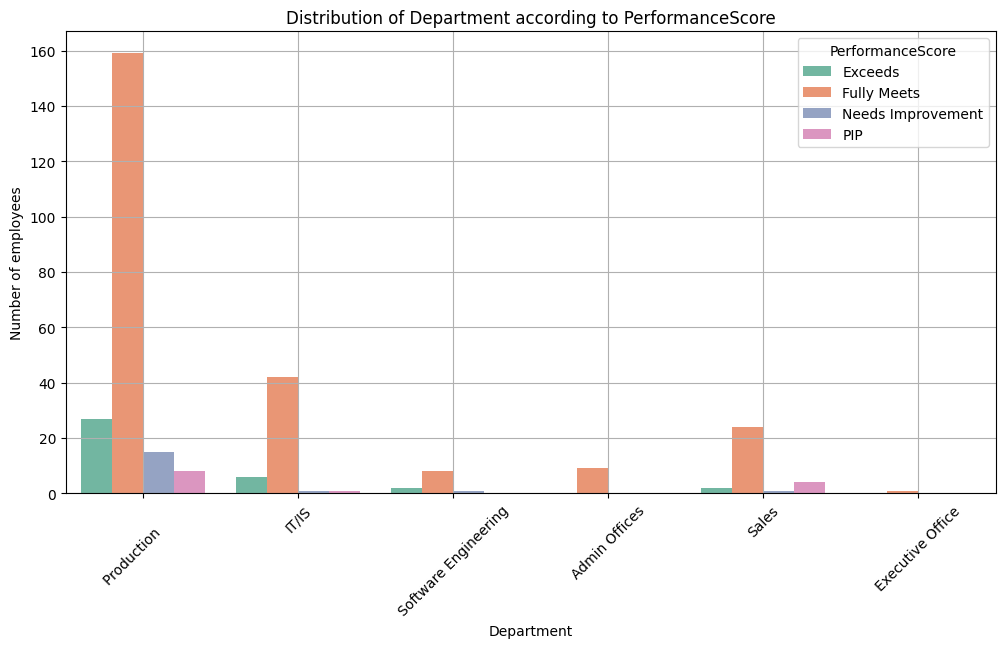

In [ ]:
# Countplot : Barplot groupé
plt.figure(figsize=(12, 6))
sns.countplot(data=dt_cp, x=cat_var1, hue=cat_var2, palette='Set2')
plt.title(f'Distribution of {cat_var1} according to {cat_var2}')
plt.xlabel(cat_var1)
plt.ylabel('Number of employees')
plt.xticks(rotation=45)
plt.legend(title=cat_var2)
plt.grid(True)
plt.show()

# 4. Segmentation et analyse de groupes

In [ ]:
# Segmentation par Département
segmentation = dt_cp.groupby('Department').agg({
    'EngagementSurvey': 'mean',
    'EmpSatisfaction': 'mean',
    'Absences': 'sum',
    'PerformanceScore': lambda x: x.value_counts().idxmax()  # Score le plus fréquent
})

print(segmentation)

                      EngagementSurvey  EmpSatisfaction  Absences  \
Department                                                          
Admin Offices                 4.393333         3.555556        78   
Executive Office              4.830000         3.000000        10   
IT/IS                         4.154000         3.960000       522   
Production                    4.129569         3.861244      2120   
Sales                         3.818710         4.032258       358   
Software Engineering          4.061818         4.090909        96   

                     PerformanceScore  
Department                             
Admin Offices             Fully Meets  
Executive Office          Fully Meets  
IT/IS                     Fully Meets  
Production                Fully Meets  
Sales                     Fully Meets  
Software Engineering      Fully Meets  


In [ ]:
# Segmentation par Manager
segmentation = dt_cp.groupby('ManagerName').agg({
    'EngagementSurvey': 'mean',
    'EmpSatisfaction': 'mean',
    'Absences': 'sum',
    'PerformanceScore': lambda x: x.value_counts().idxmax()  # Score le plus fréquent
})

print(segmentation)

                    EngagementSurvey  EmpSatisfaction  Absences  \
ManagerName                                                       
Alex Sweetwater             4.076667         4.222222        88   
Amy Dunn                    3.924762         3.809524       200   
Board of Directors          4.915000         3.000000        13   
Brandon R. LeBlanc          4.348571         3.571429        55   
Brannon Miller              4.041818         3.409091       202   
Brian Champaigne            4.058750         4.000000       100   
David Stanley               4.150952         3.952381       218   
Debra Houlihan              3.840000         4.333333        26   
Elijiah Gray                4.074545         3.954545       201   
Eric Dougall                4.585000         3.500000        36   
Janet King                  4.182105         3.631579       194   
Jennifer Zamora             3.990000         4.285714        65   
John Smith                  3.786429         3.928571       18

In [ ]:
# Segmentation par Source de recrutement
segmentation = dt_cp.groupby('RecruitmentSource').agg({
    'EngagementSurvey': 'mean',
    'EmpSatisfaction': 'mean',
    'Absences': 'sum',
    'PerformanceScore': lambda x: x.value_counts().idxmax()  # Score le plus fréquent
})

print(segmentation)

                         EngagementSurvey  EmpSatisfaction  Absences  \
RecruitmentSource                                                      
CareerBuilder                    4.090000         3.652174       237   
Diversity Job Fair               4.077931         3.793103       330   
Employee Referral                4.186774         3.935484       319   
Google Search                    4.189796         4.061224       508   
Indeed                           3.994828         3.942529       868   
LinkedIn                         4.135526         3.894737       783   
On-line Web application          5.000000         5.000000         1   
Other                            4.550000         3.500000        18   
Website                          4.218462         3.384615       120   

                        PerformanceScore  
RecruitmentSource                         
CareerBuilder                Fully Meets  
Diversity Job Fair           Fully Meets  
Employee Referral            Fully 

In [ ]:
# Segmentation par projet spécial
segmentation = dt_cp.groupby('SpecialProjectsCount').agg({
    'EngagementSurvey': 'mean',
    'EmpSatisfaction': 'mean',
    'Absences': 'sum',
    'PerformanceScore': lambda x: x.value_counts().idxmax()  # Score le plus fréquent
})

print(segmentation)

                      EngagementSurvey  EmpSatisfaction  Absences  \
SpecialProjectsCount                                                
0                             4.098921         3.887967      2490   
1                             2.400000         2.000000        20   
2                             5.000000         3.000000         3   
3                             4.766667         4.333333        19   
4                             3.986667         3.777778       102   
5                             4.400952         3.904762       188   
6                             4.071905         3.714286       198   
7                             3.963333         4.333333       138   
8                             3.650000         4.500000        26   

                     PerformanceScore  
SpecialProjectsCount                   
0                         Fully Meets  
1                                 PIP  
2                         Fully Meets  
3                         Fully Meets  


In [ ]:
# Départments
# Profils à fort potentiels :
# Profils à risque :

# 5. Modélisation prédictive

Classification Report :

                   precision    recall  f1-score   support

          Exceeds       0.25      0.11      0.15         9
      Fully Meets       0.88      0.95      0.91        79
Needs Improvement       0.50      0.25      0.33         4
              PIP       0.33      0.50      0.40         2

         accuracy                           0.83        94
        macro avg       0.49      0.45      0.45        94
     weighted avg       0.79      0.83      0.81        94


Confusion Matrix :



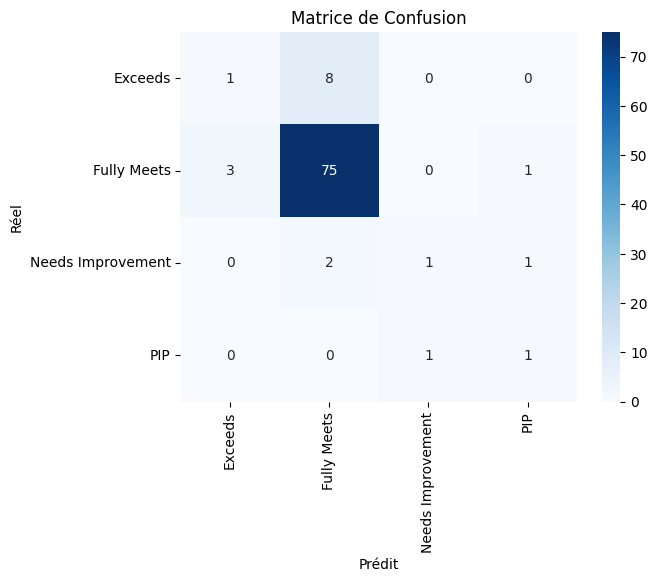

In [ ]:
# Modèle de classification (Random Forest) pour prédire PerformanceScore

# Préparation des données
feature = ['Salary', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'Absences']
X = dt_cp[feature]

# Encoder la cible (PerformanceScore) en numérique
le = LabelEncoder()
y = le.fit_transform(dt_cp['PerformanceScore'].astype(str))

# Gestion des valeurs manquantes
X = X.fillna(X.mean())

# Division des données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Création et entraînement d'un modèle
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation
print("Classification Report :\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("\nConfusion Matrix :\n")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

In [ ]:
# Analyse de l'importance des variables

# 6. Recommandation RH

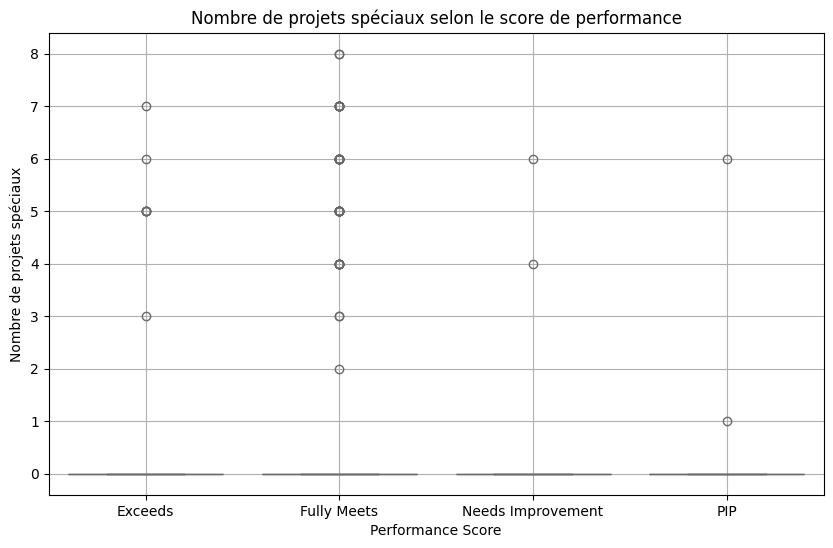

In [ ]:
# Boxplot : SpecialProjectsCount vs PerformanceScore
plt.figure(figsize=(10,6))
sns.boxplot(data=dt_cp, x='PerformanceScore', y='SpecialProjectsCount', palette='Set3')
plt.title('Nombre de projets spéciaux selon le score de performance')
plt.xlabel('Performance Score')
plt.ylabel('Nombre de projets spéciaux')
plt.grid(True)
plt.show()

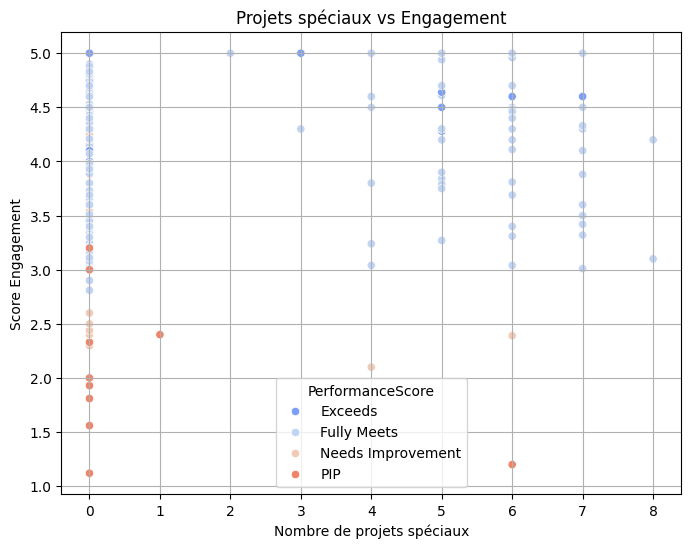

In [ ]:
# Scatterplot : SpecialProjectsCount vs EngagementSurvey
plt.figure(figsize=(8,6))
sns.scatterplot(data=dt_cp, x='SpecialProjectsCount', y='EngagementSurvey', hue='PerformanceScore', palette='coolwarm')
plt.title('Projets spéciaux vs Engagement')
plt.xlabel('Nombre de projets spéciaux')
plt.ylabel('Score Engagement')
plt.grid(True)
plt.show()

In [ ]:
#

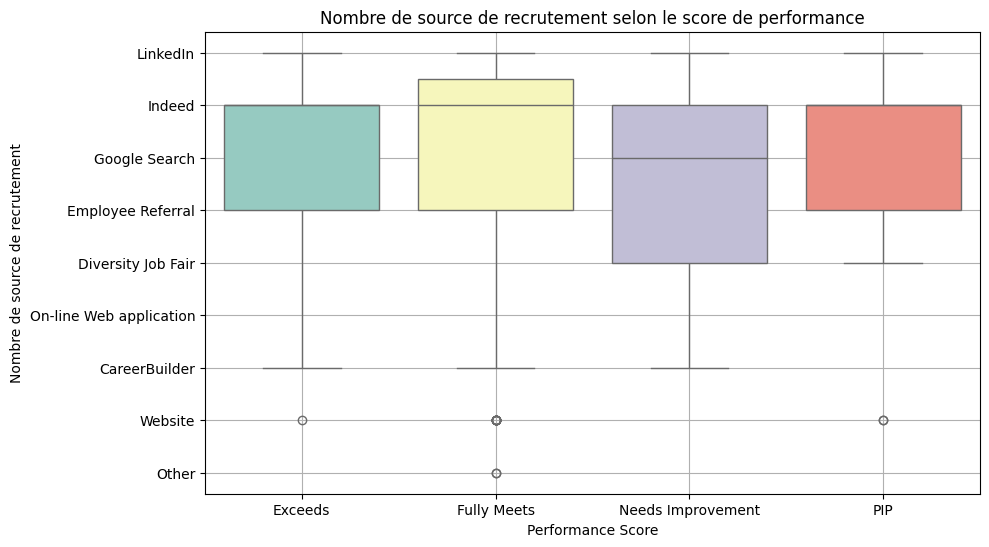

In [ ]:
# Boxplot : RecruitmentSource vs PerformanceScore
plt.figure(figsize=(10,6))
sns.boxplot(data=dt_cp, x='PerformanceScore', y='RecruitmentSource', palette='Set3')
plt.title('Nombre de source de recrutement selon le score de performance')
plt.xlabel('Performance Score')
plt.ylabel('Nombre de source de recrutement')
plt.grid(True)
plt.show()

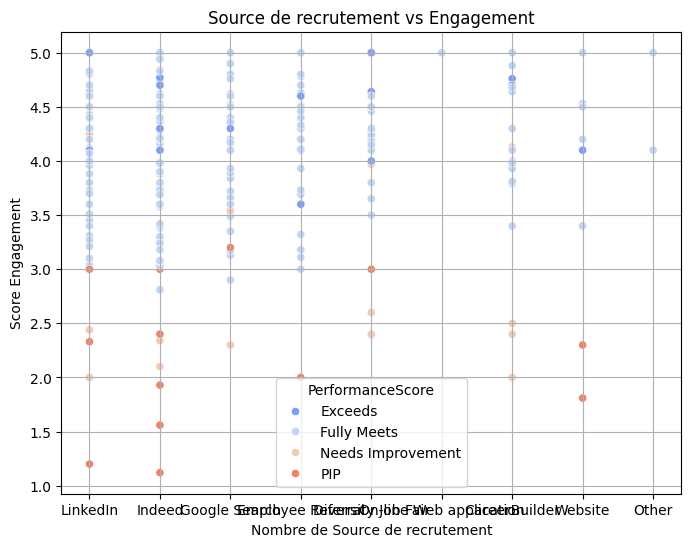

In [ ]:
# Scatterplot : RecruitmentSource vs EngagementSurvey
plt.figure(figsize=(8,6))
sns.scatterplot(data=dt_cp, x='RecruitmentSource', y='EngagementSurvey', hue='PerformanceScore', palette='coolwarm')
plt.title('Source de recrutement vs Engagement')
plt.xlabel('Nombre de Source de recrutement')
plt.ylabel('Score Engagement')
plt.grid(True)
plt.show()

In [ ]:
# Actions basées sur le profils (formations, mobilité interne)

Les projets spéciaux sont un levier clair de performance : Il serait pertinent d'encourager la participation à ces projets pour les profils Fully Meets ou à potentiel.

L’engagement est corrélé à l’implication : Favoriser des initiatives RH axées sur la reconnaissance et les challenges transverses.

Surveiller les absences dans certains départements : Des corrélations négatives avec la performance peuvent révéler un problème de climat ou de motivation.